**Feature selection**

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
X = iris.data
y = iris.target

print(X[:10])
print(y[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.feature_selection import mutual_info_classif
info_gain = mutual_info_classif(X,y)
info_gain

array([0.50699092, 0.24970277, 0.9812877 , 0.97673199])

In [ ]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
sorted(info_gain,reverse=True)

[0.9812876959706767,
 0.9767319852277008,
 0.5069909234859789,
 0.24970276824295845]

In [ ]:
import numpy as np
help(np.argsort)

Help on function argsort in module numpy:

argsort(a, axis=-1, kind=None, order=None)
    Returns the indices that would sort an array.
    
    Perform an indirect sort along the given axis using the algorithm specified
    by the `kind` keyword. It returns an array of indices of the same shape as
    `a` that index data along the given axis in sorted order.
    
    Parameters
    ----------
    a : array_like
        Array to sort.
    axis : int or None, optional
        Axis along which to sort.  The default is -1 (the last axis). If None,
        the flattened array is used.
    kind : {'quicksort', 'mergesort', 'heapsort', 'stable'}, optional
        Sorting algorithm. The default is 'quicksort'. Note that both 'stable'
        and 'mergesort' use timsort under the covers and, in general, the
        actual implementation will vary with data type. The 'mergesort' option
        is retained for backwards compatibility.
    
        .. versionchanged:: 1.15.0.
           The 'stab

In [ ]:
feature_ranked = np.argsort(info_gain)[::-1]
for i in feature_ranked:
  print(f'{iris.feature_names[i]}:{info_gain[i]}')

petal length (cm):0.9812876959706767
petal width (cm):0.9767319852277008
sepal length (cm):0.5069909234859789
sepal width (cm):0.24970276824295845


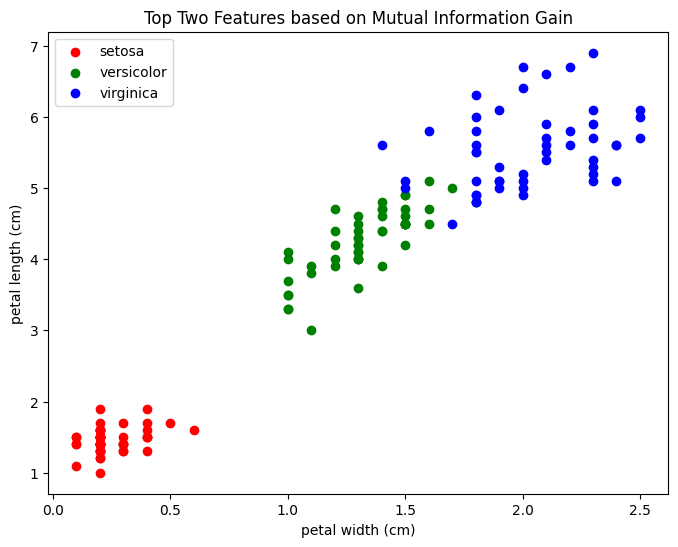

In [ ]:
# Compute mutual information gain
info_gain = mutual_info_classif(X, y)

# Get the indices of the two features with the highest mutual information gain
top_features_indices = np.argsort(info_gain)[::-1][:2]

# Extract the top two features
top_features = X[:, top_features_indices]

# Plot the data points using the top two features
plt.figure(figsize=(8, 6))
for i, c in zip(range(3), ['red', 'green', 'blue']):
    plt.scatter(top_features[y == i, 0], top_features[y == i, 1], c=c, label=iris.target_names[i])

# Label the plot
plt.title('Top Two Features based on Mutual Information Gain')
plt.xlabel(iris.feature_names[top_features_indices[0]])
plt.ylabel(iris.feature_names[top_features_indices[1]])
plt.legend()
plt.show()